In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import filter warnings
import warnings
warnings.filterwarnings('ignore')

# Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(message)s - %(levelname)s',
                    filename = 'students.log',
                    filemode = 'w',
                    force = True)

# Importing machine Learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Loading OrderedDict
from collections import OrderedDict

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
logging.info('All libraries imported successfully!')

In [3]:
# Data Ingestion
df = pd.read_csv(r'C:\StudentPlacement_PredictionModel\data\raw\student_placement_prediction_dataset_2026.csv')
df.head()

,student_id,age,gender,cgpa,branch,college_tier,internships_count,projects_count,certifications_count,coding_skill_score,...,mock_interview_score,attendance_percentage,backlogs,extracurricular_score,leadership_score,volunteer_experience,sleep_hours,study_hours_per_day,placement_status,salary_package_lpa
0,1,24,Male,7.53,IT,Tier 2,4,6,1,99.238568,...,72.647009,77.463863,2,63.382726,52.938240,Yes,6.7,3.6,Not Placed,0.00
1,2,21,Male,7.92,CSE,Tier 2,1,3,6,80.966123,...,61.699110,88.887600,1,73.694605,60.198856,No,4.4,2.3,Not Placed,0.00
2,3,22,Female,8.60,EEE,Tier 1,0,1,1,49.177184,...,87.396911,74.153265,0,63.329294,43.708803,No,8.8,5.9,Placed,11.99
3,4,24,Male,6.68,CSE,Tier 1,0,2,2,79.359084,...,58.401069,87.635955,1,47.636099,56.549154,Yes,8.1,4.4,Not Placed,0.00
4,5,20,Female,8.43,IT,Tier 3,1,4,3,65.018573,...,74.489201,79.120749,1,0.000000,67.268893,No,8.7,3.4,Placed,12.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   student_id                 100000 non-null  int64  
 1   age                        100000 non-null  int64  
 2   gender                     100000 non-null  object 
 3   cgpa                       100000 non-null  float64
 4   branch                     100000 non-null  object 
 5   college_tier               100000 non-null  object 
 6   internships_count          100000 non-null  int64  
 7   projects_count             100000 non-null  int64  
 8   certifications_count       100000 non-null  int64  
 9   coding_skill_score         100000 non-null  float64
 10  aptitude_score             100000 non-null  float64
 11  communication_skill_score  100000 non-null  float64
 12  logical_reasoning_score    100000 non-null  float64
 13  hackathons_participated    100

In [5]:
df.isnull().sum()

student_id                   0
age                          0
gender                       0
cgpa                         0
branch                       0
college_tier                 0
internships_count            0
projects_count               0
certifications_count         0
coding_skill_score           0
aptitude_score               0
communication_skill_score    0
logical_reasoning_score      0
hackathons_participated      0
github_repos                 0
linkedin_connections         0
mock_interview_score         0
attendance_percentage        0
backlogs                     0
extracurricular_score        0
leadership_score             0
volunteer_experience         0
sleep_hours                  0
study_hours_per_day          0
placement_status             0
salary_package_lpa           0
dtype: int64

In [6]:
df.shape

(100000, 26)

In [7]:
# Data Exploration
numerical_col = df.select_dtypes(exclude =  'object').columns
categorical_col = df.select_dtypes(include = 'object').columns

# Numerical Descriptive Stats
numerical_stats = []

Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR 
Outlier_Count = (df[numerical_col] < LW) | (df[numerical_col] > UW)
Outlier_Percentage = (Outlier_Count.sum()/len(df))*100

for i in numerical_col:
    num_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Std': df[i].std(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Whisker' : LW,
        'Upper Whisker' : UW,
        'Outlier_Count': Outlier_Count,
        'Outlier_Percentage': Outlier_Percentage,
    })
    numerical_stats.append(num_stats)
    numerical_stats_df = pd.DataFrame(numerical_stats)

categorical_stats = []

for i in categorical_col:
    cat_stats = OrderedDict({
        'Feature' : i,
        'Count' : df[i].count(),
        'Unique' : df[i].nunique(),
        'Mode' : df[i].mode(), 
    })
    categorical_stats.append(cat_stats)
    categorical_stats_df = pd.DataFrame(categorical_stats)
print(numerical_stats_df, categorical_stats_df)

                      Feature   Count          Mean        Median  \
0                  student_id  100000  50000.500000  50000.500000   
1                         age  100000     21.005740     21.000000   
2                        cgpa  100000      7.496890      7.500000   
3           internships_count  100000      1.502230      1.000000   
4              projects_count  100000      3.001860      3.000000   
5        certifications_count  100000      2.005150      2.000000   
6          coding_skill_score  100000     69.825326     70.006250   
7              aptitude_score  100000     64.988108     65.011394   
8   communication_skill_score  100000     67.960744     67.973221   
9     logical_reasoning_score  100000     65.931696     66.003829   
10    hackathons_participated  100000      1.000690      1.000000   
11               github_repos  100000      4.005160      4.000000   
12       linkedin_connections  100000    524.559110    523.000000   
13       mock_interview_score  100

In [8]:
# Spliting into X and y
df_placed = df[df['placement_status'] == 'Placed']

# Drop weak / noisy features (based on correlation analysis)
columns_to_drop = [
    'student_id',
    'projects_count',
    'aptitude_score',
    'logical_reasoning_score',
    'communication_skill_score',
    'leadership_score',
    'sleep_hours'
]

df_placed = df_placed.drop(columns=columns_to_drop, axis=1)

X = df_placed.drop(columns = ['salary_package_lpa','placement_status'],axis = 1)
y = df_placed['salary_package_lpa']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3, 
                                                    random_state = 42)

# As numerical column needs scaling and categoricla columns needs encoding so we will segregate them and apply respective transformations
numerical_col = X_train.select_dtypes(include =  np.number).columns
categorical_col = X_train.select_dtypes(include = 'object').columns

# Encoding 
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_col),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_col)
    ])

In [30]:
X

,age,gender,cgpa,branch,college_tier,internships_count,certifications_count,coding_skill_score,hackathons_participated,github_repos,linkedin_connections,mock_interview_score,attendance_percentage,backlogs,extracurricular_score,volunteer_experience,study_hours_per_day
2,22,Female,8.60,EEE,Tier 1,0,1,49.177184,0,2,568,87.396911,74.153265,0,63.329294,No,5.9
4,20,Female,8.43,IT,Tier 3,1,3,65.018573,1,4,833,74.489201,79.120749,1,0.000000,No,3.4
5,22,Male,7.44,CSE,Tier 2,1,1,49.758865,3,8,77,66.138578,82.038139,0,54.150818,No,3.4
8,19,Male,8.52,Mechanical,Tier 2,2,0,100.000000,0,7,269,64.035703,89.884948,0,68.598878,No,4.2
9,20,Female,8.07,Civil,Tier 2,2,2,93.421972,0,6,747,72.217117,88.901107,0,86.199176,No,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,20,Male,7.75,CSE,Tier 2,3,1,55.516358,0,8,144,61.817704,100.000000,1,55.177100,No,5.0
99991,23,Female,8.10,Civil,Tier 2,2,4,81.775079,1,5,959,80.204330,72.705861,1,42.276988,Yes,3.2
99995,21,Male,7.97,Mechanical,Tier 2,0,5,71.483407,0,5,495,57.738311,75.471631,0,54.399022,Yes,4.3
99997,20,Female,6.71,IT,Tier 2,2,4,66.691775,0,6,272,70.797752,93.115933,0,64.989215,Yes,2.9


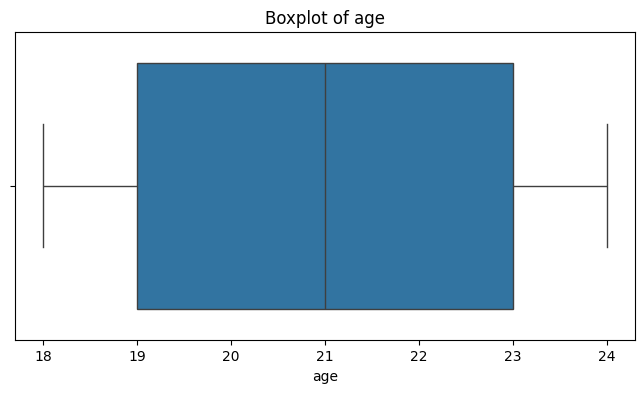

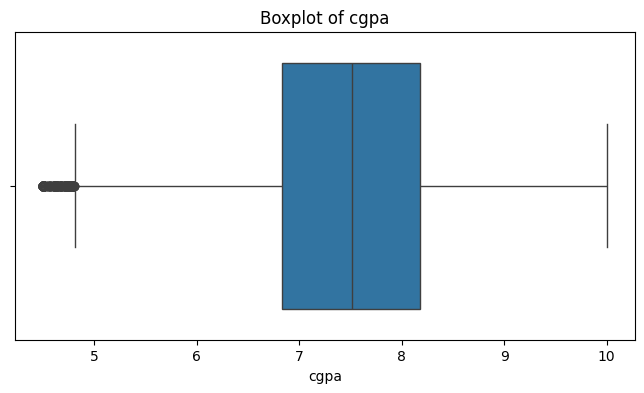

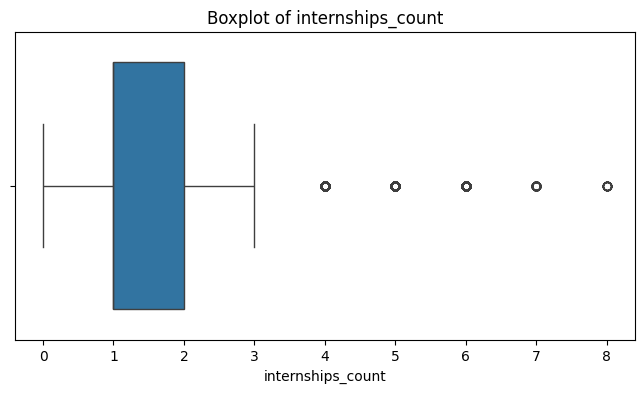

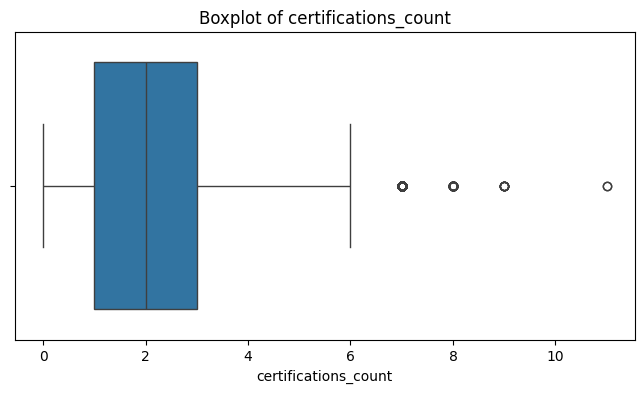

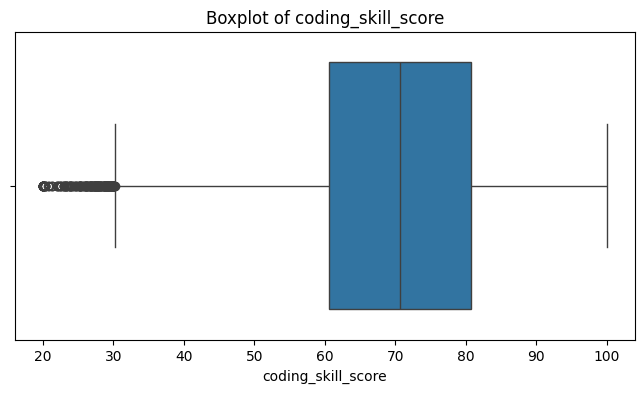

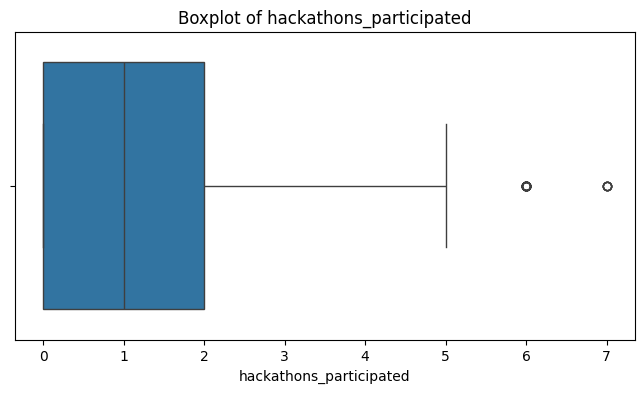

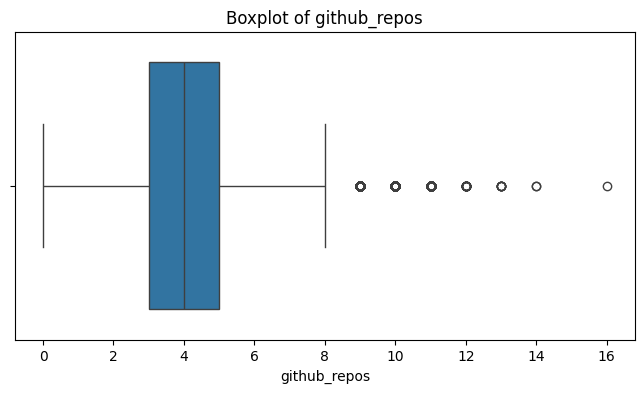

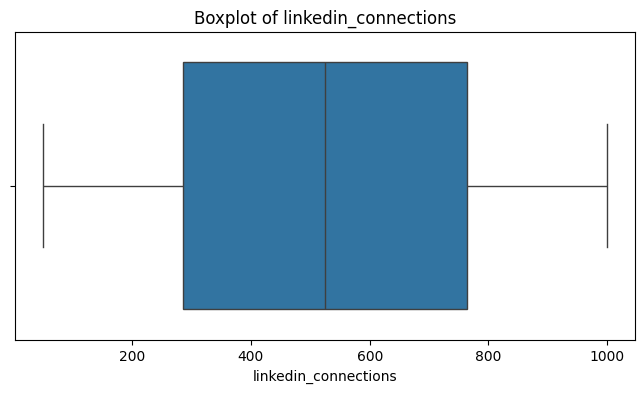

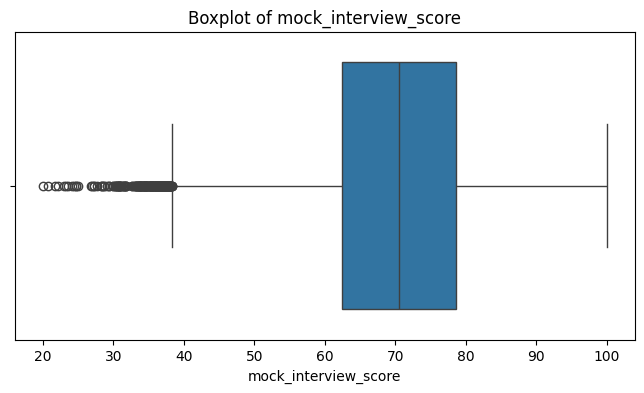

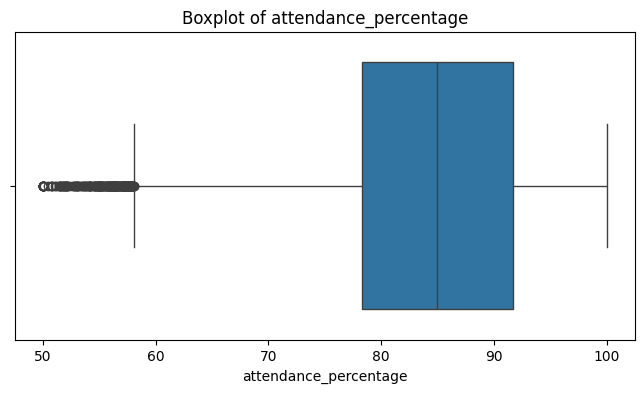

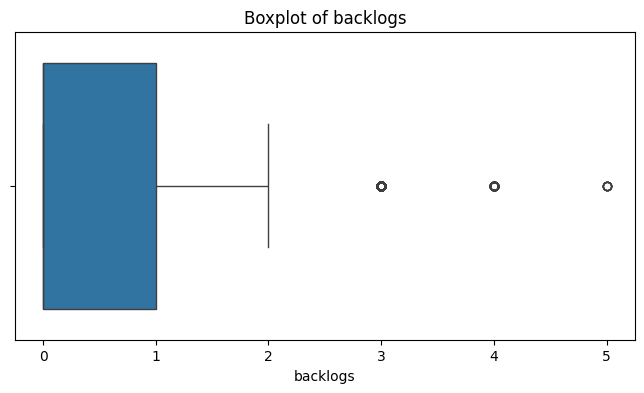

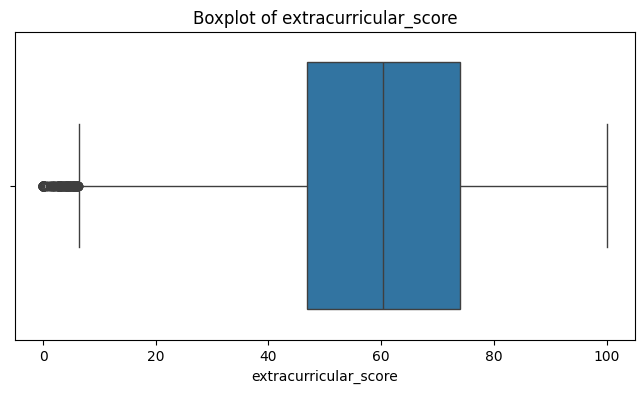

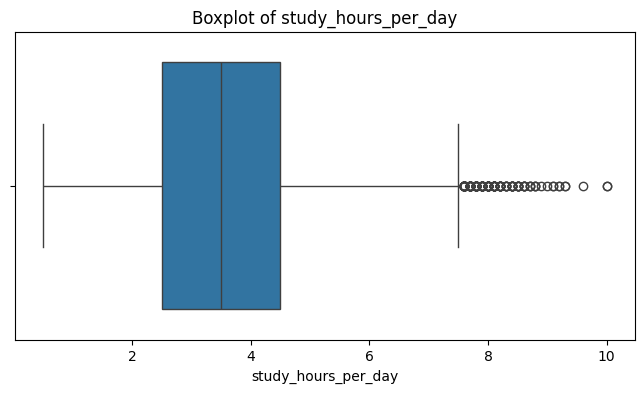

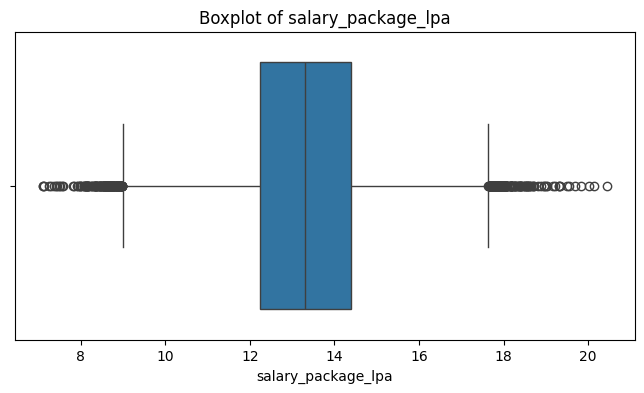

In [9]:
# Checking for Outliers

num_cols = df_placed.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_placed[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse', random_state=42),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "Elastic Net" : ElasticNet()
}

In [11]:
baseline_results = {}

for name, regressor in models.items():

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", regressor)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    baseline_results[name] = {
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae
    }
    print(f"{name}")
    print(f"  R2   : {r2:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  MAE  : {mae:.4f}")
    print("-" * 40)

Linear Regression
  R2   : 0.6110
  RMSE : 0.9922
  MAE  : 0.7925
----------------------------------------
Decision Tree
  R2   : 0.1523
  RMSE : 1.4647
  MAE  : 1.1692
----------------------------------------
Random Forest
  R2   : 0.5833
  RMSE : 1.0269
  MAE  : 0.8199
----------------------------------------
Gradient Boosting
  R2   : 0.6082
  RMSE : 0.9958
  MAE  : 0.7947
----------------------------------------
AdaBoost
  R2   : 0.5686
  RMSE : 1.0449
  MAE  : 0.8330
----------------------------------------
Extra Trees
  R2   : 0.5789
  RMSE : 1.0323
  MAE  : 0.8234
----------------------------------------
Bagging
  R2   : 0.5475
  RMSE : 1.0701
  MAE  : 0.8546
----------------------------------------
KNN
  R2   : 0.4352
  RMSE : 1.1955
  MAE  : 0.9536
----------------------------------------
XGBoost
  R2   : 0.5819
  RMSE : 1.0287
  MAE  : 0.8203
----------------------------------------
Ridge
  R2   : 0.6110
  RMSE : 0.9922
  MAE  : 0.7925
----------------------------------------

In [12]:
# K - Fold 
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

top_models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge": Ridge()
}

cv_results = {}

for name, regressor in top_models.items():

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", regressor)
    ])

    scores = cross_val_score(
        pipeline,
        X,
        y,
        cv=kf,
        scoring='r2',
        n_jobs=-1
    )

    cv_results[name] = {
        "Mean R2": scores.mean(),
        "Std Dev": scores.std()
    }

    print(f"{name}")
    print(f"  Mean R2: {scores.mean():.4f}")
    print(f"  Std Dev: {scores.std():.4f}")
    print("--------")


Linear Regression
  Mean R2: 0.6077
  Std Dev: 0.0083
--------
Gradient Boosting
  Mean R2: 0.6043
  Std Dev: 0.0086
--------
Random Forest
  Mean R2: 0.5825
  Std Dev: 0.0095
--------
Ridge
  Mean R2: 0.6077
  Std Dev: 0.0083
--------


In [13]:
tuning_config = {
    "Gradient Boost" : {
        "model" : GradientBoostingRegressor(random_state=42),
        "params" : {
            "regressor__n_estimators" : [100, 200, 300],
            "regressor__learning_rate" : [0.01, 0.05, 0.1],
            "regressor__subsample" : [0.8, 1.0],
            "regressor__max_depth" : [3, 5, 7],
        }
    },
    "Lasso" : {
        "model" : Lasso(),
        "params" : {
            "regressor__alpha" : [0.01, 0.1, 1, 10],
            "regressor__max_iter" : [1000, 5000, 10000]
        }
    },
}

best_models = {}

for name, config in tuning_config.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", config["model"])
    ])

    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config["params"],
        cv=kf,
        scoring='r2',
        n_jobs=-1,
        n_iter=10
    )

    random_search.fit(X_train, y_train)

    best_models[name] = {
        "Best Estimator": random_search.best_estimator_,
        "Best Params": random_search.best_params_,
        "Best R2": random_search.best_score_
    }

    print(f"{name}")
    print(f"  Best R2: {random_search.best_score_:.4f}")
    print(f"  Best Params: {random_search.best_params_}")
    print("--------")



Gradient Boost
  Best R2: 0.6022
  Best Params: {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.05}
--------
Lasso
  Best R2: 0.6061
  Best Params: {'regressor__max_iter': 5000, 'regressor__alpha': 0.01}
--------


In [14]:
best_model = best_models["Lasso"]["Best Estimator"]
import pickle
import os
os.makedirs('artifacts', exist_ok=True)
with open('artifacts/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)  

In [17]:
sample_input = X_test.iloc[[1]]  # taking 1 row as example
prediction = best_model.predict(sample_input)
print("Predicted Salary Package (LPA):", round(prediction[0], 2))

Predicted Salary Package (LPA): 13.55


In [18]:
print(y_test.iloc[1])

13.19


In [20]:
X_train.columns

Index(['age', 'gender', 'cgpa', 'branch', 'college_tier', 'internships_count',
       'certifications_count', 'coding_skill_score', 'hackathons_participated',
       'github_repos', 'linkedin_connections', 'mock_interview_score',
       'attendance_percentage', 'backlogs', 'extracurricular_score',
       'volunteer_experience', 'study_hours_per_day'],
      dtype='object')

In [24]:
df_placed.columns

Index(['age', 'gender', 'cgpa', 'branch', 'college_tier', 'internships_count',
       'certifications_count', 'coding_skill_score', 'hackathons_participated',
       'github_repos', 'linkedin_connections', 'mock_interview_score',
       'attendance_percentage', 'backlogs', 'extracurricular_score',
       'volunteer_experience', 'study_hours_per_day', 'placement_status',
       'salary_package_lpa'],
      dtype='object')

In [40]:
X_train.columns

Index(['age', 'gender', 'cgpa', 'branch', 'college_tier', 'internships_count',
       'certifications_count', 'coding_skill_score', 'hackathons_participated',
       'github_repos', 'linkedin_connections', 'mock_interview_score',
       'attendance_percentage', 'backlogs', 'extracurricular_score',
       'volunteer_experience', 'study_hours_per_day'],
      dtype='object')

In [45]:
age = int(input("Enter the age of the student: "))
gender = input("Enter the gender of the student: ")
cgpa = float(input("Enter the CGPA of the student: "))  
branch = input("Enter the branch of the student: ")
college_tier = (input("Enter the college tier of the student: "))
internships_count = int(input("Enter the number of internships: "))
certifications_count = int(input("Enter the number of certifications: ")) 
coding_skill_score = float(input("Enter the coding skill score: "))  
hackathons_participated = int(input("Enter the number of hackathons participated: "))
github_repos = int(input("Enter the number of GitHub repositories: "))
linkedin_connections = int(input("Enter the number of LinkedIn connections: "))
mock_interview_score = float(input("Enter the mock interview score: "))
attendance_percentage = float(input("Enter the attendance percentage: "))
backlogs = int(input("Enter the number of backlogs: "))
extracurricular_score = float(input("Enter the extracurricular score: "))
volunteer_experience = input("Enter the volunteer experience (Yes/No): ")
study_hours_per_day = float(input("Enter the study hours per day: "))

user_input = pd.DataFrame(columns=best_model.feature_names_in_)
user_input.loc[0] = [
    age, gender, cgpa, branch, college_tier,internships_count, certifications_count,coding_skill_score, hackathons_participated,
    github_repos, linkedin_connections, mock_interview_score, attendance_percentage, backlogs, extracurricular_score,
    volunteer_experience, study_hours_per_day
]
prediction = best_model.predict(user_input)
print("Prediction:", prediction)

Prediction: [15.88626858]


In [44]:
print(set(user_input.columns))
print(set(best_model.feature_names_in_))

{'gender', 'college_tier', 'hackathons_participated', 'coding skill_score', 'certifications_count', 'linkedin_connections', 'age', 'branch', 'backlogs', 'volunteer_experience', 'internship_count', 'study_hours_per_day', 'attendance_percentage', 'cgpa', 'mock_interview_score', 'github_repos', 'extracurricular_score'}
{'gender', 'college_tier', 'hackathons_participated', 'linkedin_connections', 'certifications_count', 'extracurricular_score', 'age', 'branch', 'backlogs', 'volunteer_experience', 'study_hours_per_day', 'attendance_percentage', 'cgpa', 'mock_interview_score', 'github_repos', 'coding_skill_score', 'internships_count'}


In [41]:
print(user_input.isnull().sum())

age                        0
gender                     0
cgpa                       0
branch                     0
college_tier               0
internships_count          1
certifications_count       0
coding_skill_score         1
hackathons_participated    0
github_repos               0
linkedin_connections       0
mock_interview_score       0
attendance_percentage      0
backlogs                   0
extracurricular_score      0
volunteer_experience       0
study_hours_per_day        0
dtype: int64


In [42]:
print(best_model.named_steps["preprocessor"].feature_names_in_)
print(best_model.feature_names_in_)

['age' 'gender' 'cgpa' 'branch' 'college_tier' 'internships_count'
 'certifications_count' 'coding_skill_score' 'hackathons_participated'
 'github_repos' 'linkedin_connections' 'mock_interview_score'
 'attendance_percentage' 'backlogs' 'extracurricular_score'
 'volunteer_experience' 'study_hours_per_day']
['age' 'gender' 'cgpa' 'branch' 'college_tier' 'internships_count'
 'certifications_count' 'coding_skill_score' 'hackathons_participated'
 'github_repos' 'linkedin_connections' 'mock_interview_score'
 'attendance_percentage' 'backlogs' 'extracurricular_score'
 'volunteer_experience' 'study_hours_per_day']
